# Charles Leclerc

<img src="https://www.formula1.com/content/fom-website/en/drivers/charles-leclerc/_jcr_content/image.img.1920.medium.jpg/1646818893219.jpg" width="300">

### Team: Red Bull Racing

<img src ="https://www.formula1.com/content/fom-website/en/drivers/charles-leclerc/_jcr_content/helmet.img.png/1646824728203.png" width="200">




In [28]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

In [29]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [30]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

lec_laps <- lap_data %>%
            filter(driverId == 844)

# Season Analysis

In [31]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

rmse_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5651436,94.1906,1.569843


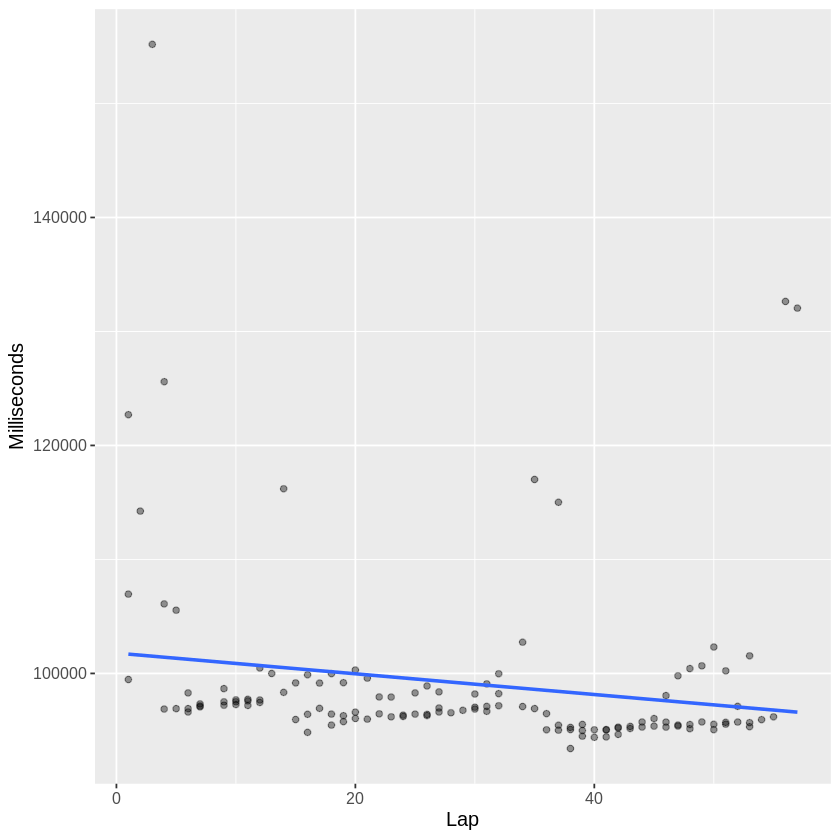

In [32]:
#1. Bahrain 

cl_bahrain <- lec_laps %>%
                filter(raceId %in% bahrain_race_ID) 

cl_bahrain_clean <- cl_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(raceId != 1045)

cl_bahrain_clean_ID <- cl_bahrain_clean %>%
                        pull(raceId)


 ### SPLITTING DATA

cl_bahrain_races <- lec_laps %>%
                    filter(raceId %in% cl_bahrain_clean_ID)

formulaone_split <- initial_split(cl_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,66
1054,66


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5597836,93.29727,1.554955


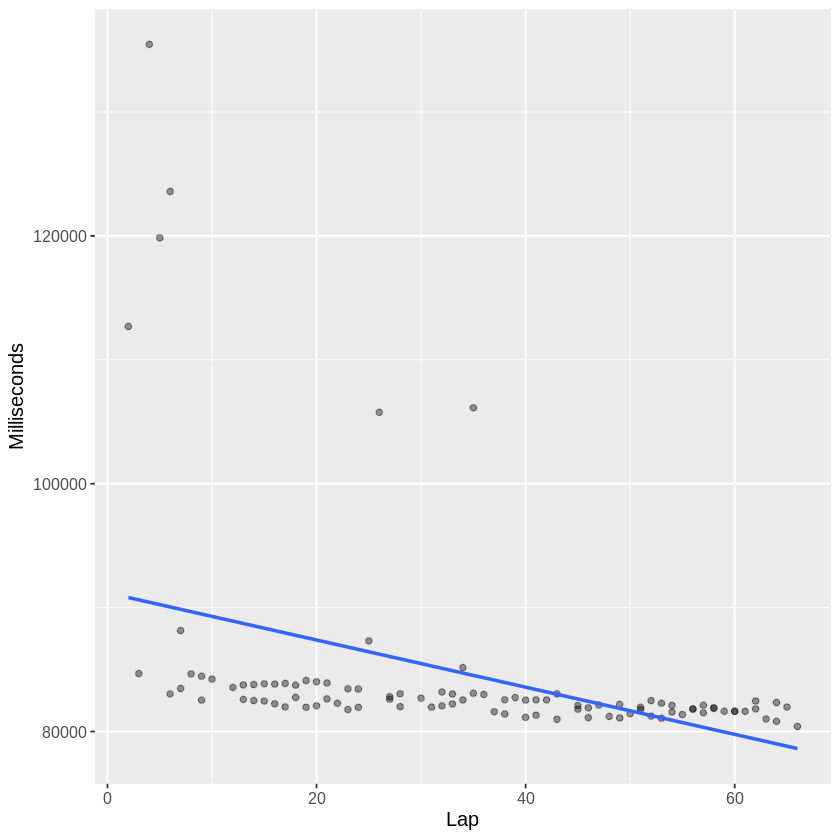

In [33]:
#2. Portimão

cl_Portimão <- lec_laps %>%
                filter(raceId %in% Portimão_race_ID) 

cl_Portimão_clean <- cl_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_Portimão_clean
cl_Portimão_clean_ID <- cl_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_Portimão_races <- lec_laps %>%
                    filter(raceId %in% cl_Portimão_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cl_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5342986,89.04977,1.484163


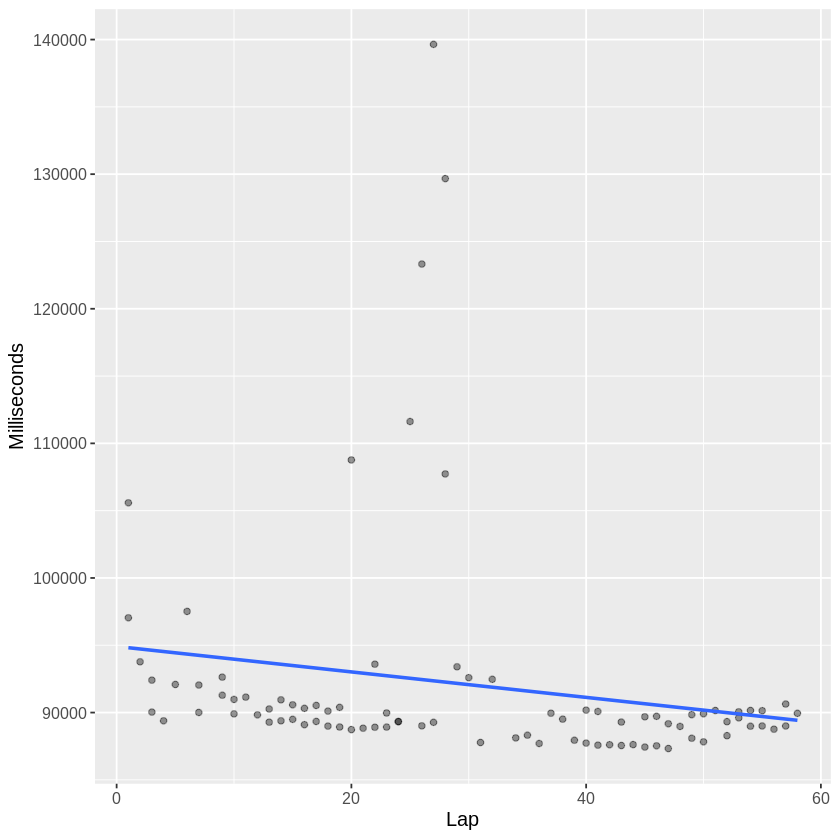

In [34]:
######################################################  Australia 

cl_aus <- lec_laps %>%
                filter(raceId %in% aus_race_ID) 

cl_aus_clean <- cl_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_aus_clean_ID <- cl_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_aus_races <- lec_laps %>%
                    filter(raceId %in% cl_aus_clean_ID)

formulaone_split <- initial_split(cl_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6586696,109.7783,1.829638


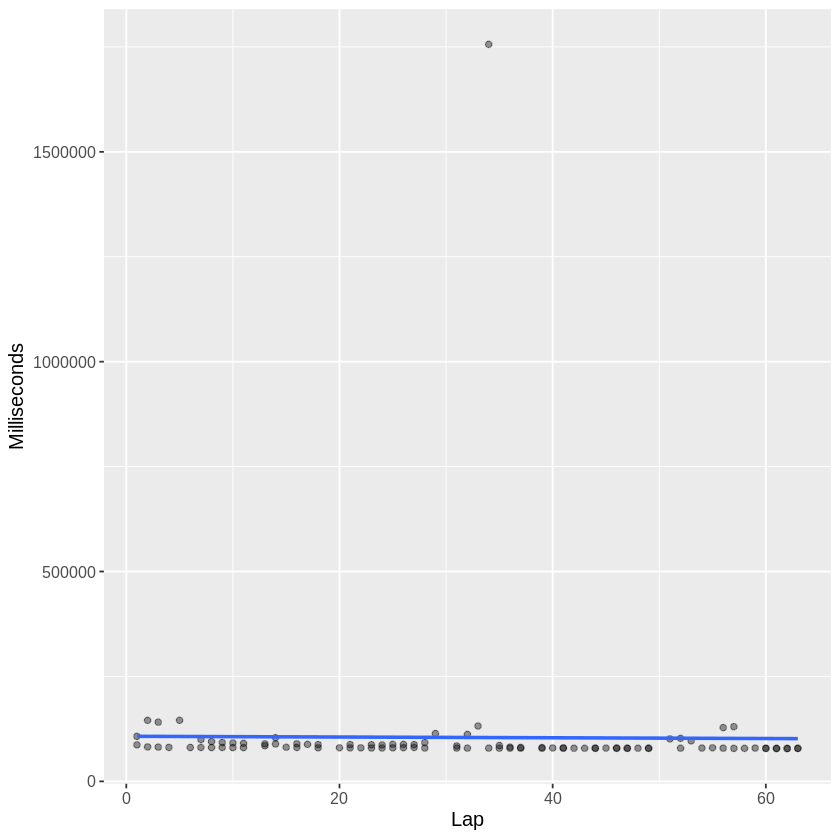

In [35]:
#4. Italy - Imola

cl_imola <- lec_laps %>%
                filter(raceId %in% imola_race_ID) 

cl_imola_clean <- cl_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_imola_clean_ID <- cl_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_imola_races <- lec_laps %>%
                    filter(raceId %in% cl_imola_clean_ID)

formulaone_split <- initial_split(cl_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5746292,95.77154,1.596192


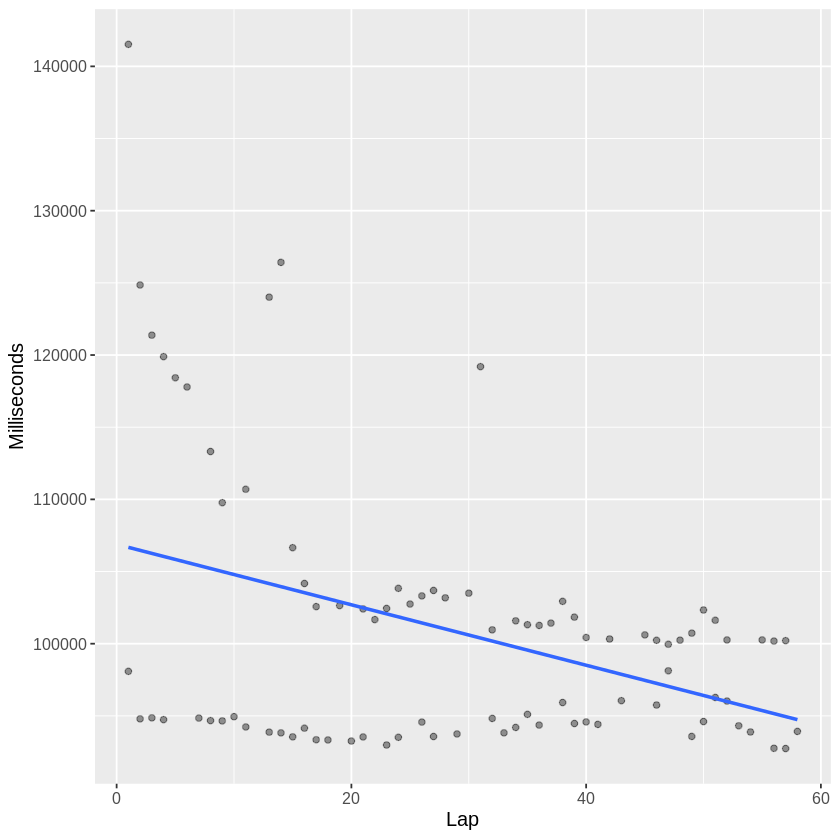

In [36]:
#5. Turkey (Replacing Miami)

cl_turkey <- lec_laps %>%
                filter(raceId %in% turkey_race_ID) 

cl_turkey_clean <- cl_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_turkey_clean_ID <- cl_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_turkey_races <- lec_laps %>%
                    filter(raceId %in% cl_turkey_clean_ID)

formulaone_split <- initial_split(cl_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1014,66
1055,66
993,64


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5761089,96.01816,1.600303


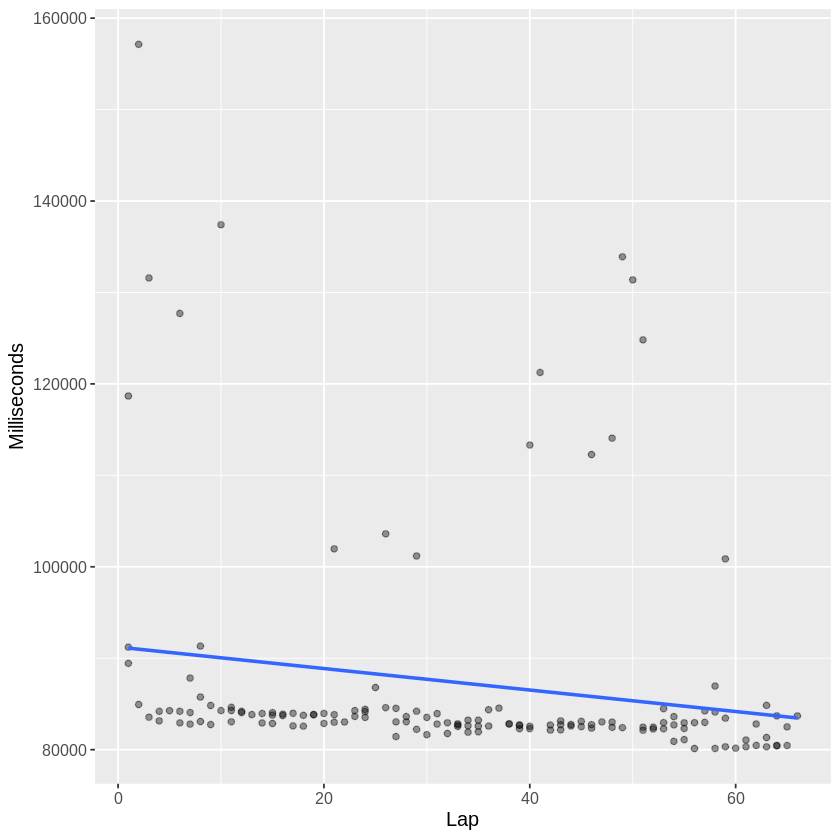

In [37]:
#6. Spain

cl_spain <- lec_laps %>%
                filter(raceId %in% spain_race_ID) 

cl_spain_clean <- cl_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(n != 38)
cl_spain_clean

cl_spain_clean_ID <- cl_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_spain_races <- lec_laps %>%
                    filter(raceId %in% cl_spain_clean_ID)

formulaone_split <- initial_split(cl_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6205891,103.4315,1.723859


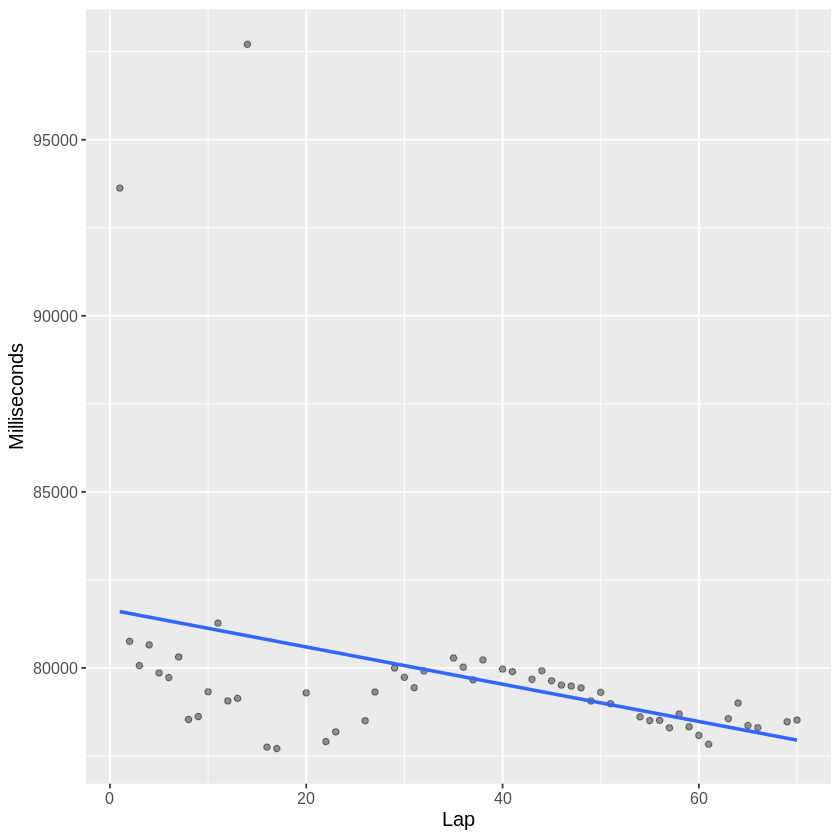

In [38]:
#7. Monaco

cl_monaco <- lec_laps %>%
                filter(raceId %in% monaco_race_ID) 

cl_monaco_clean <- cl_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(n != 16)

cl_monaco_clean_ID <- cl_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_monaco_races <- lec_laps %>%
                    filter(raceId %in% cl_monaco_clean_ID)

formulaone_split <- initial_split(cl_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5927151,98.78585,1.646431


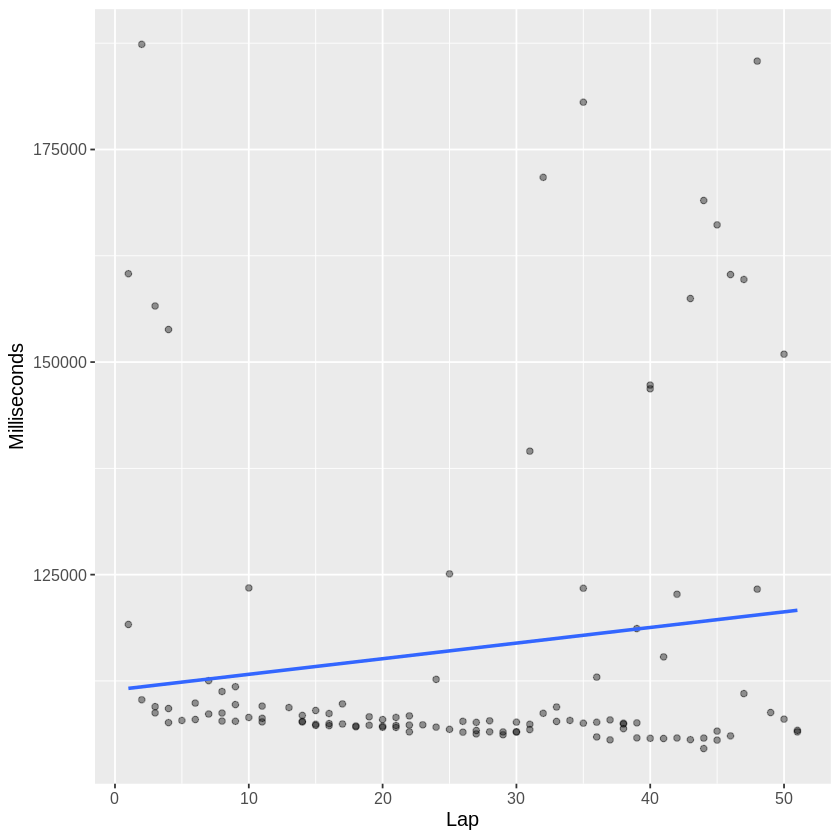

In [39]:
#8. Azerbaijan

cl_azerbaijan <- lec_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

cl_azerbaijan_clean <- cl_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_azerbaijan_clean_ID <- cl_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_azerbaijan_races <- lec_laps %>%
                    filter(raceId %in% cl_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cl_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5436733,90.61222,1.510204


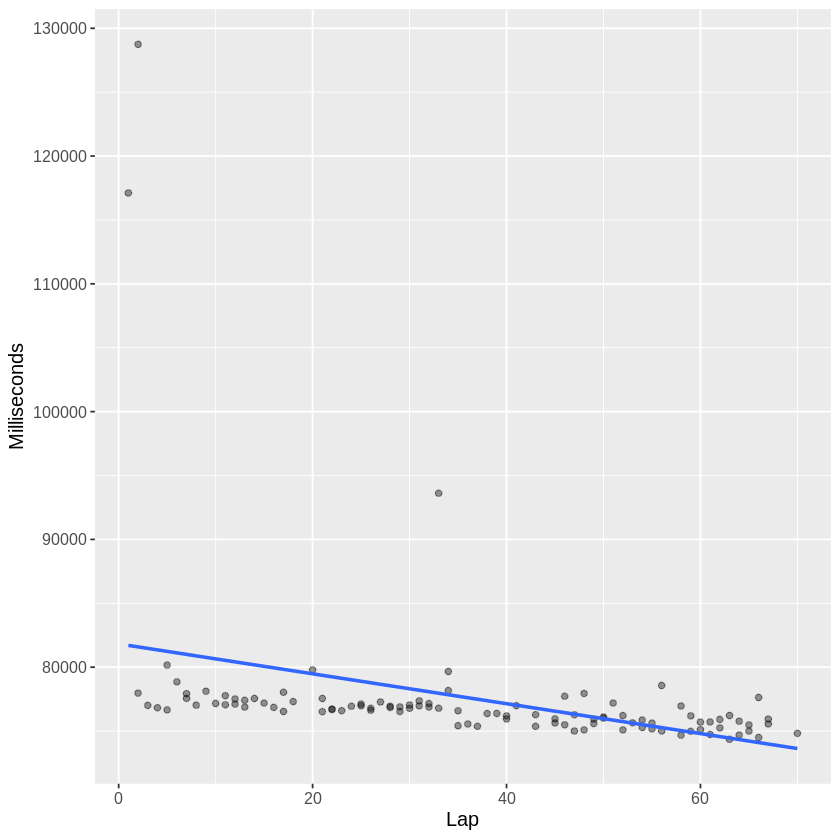

In [40]:
#9. Canada

cl_canada <- lec_laps %>%
                filter(raceId %in% canada_race_ID) 

cl_canada_clean <- cl_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_canada_clean_ID <- cl_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_canada_races <- lec_laps %>%
                    filter(raceId %in% cl_canada_clean_ID)

formulaone_split <- initial_split(cl_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5032270,83.87117,1.397853


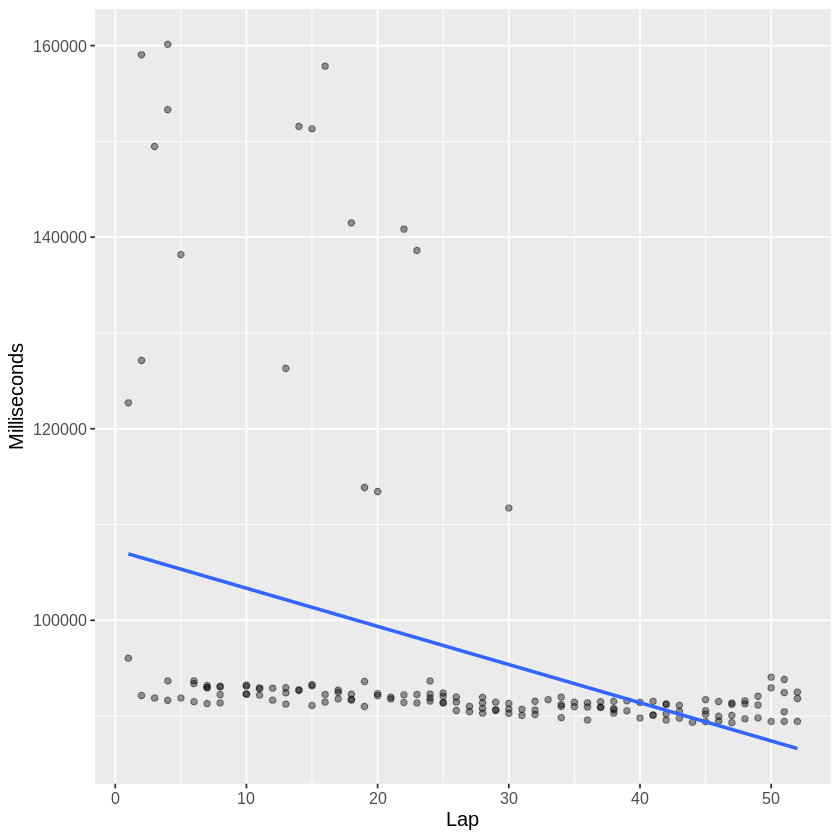

In [41]:
#10. UK

cl_uk <- lec_laps %>%
                filter(raceId %in% uk_race_ID) 

cl_uk_clean <- cl_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 18)

cl_uk_clean_ID <- cl_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_uk_races <- lec_laps %>%
                    filter(raceId %in% cl_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cl_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1018,71
1031,71
1060,71
997,70
1058,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5102097,85.03495,1.417249


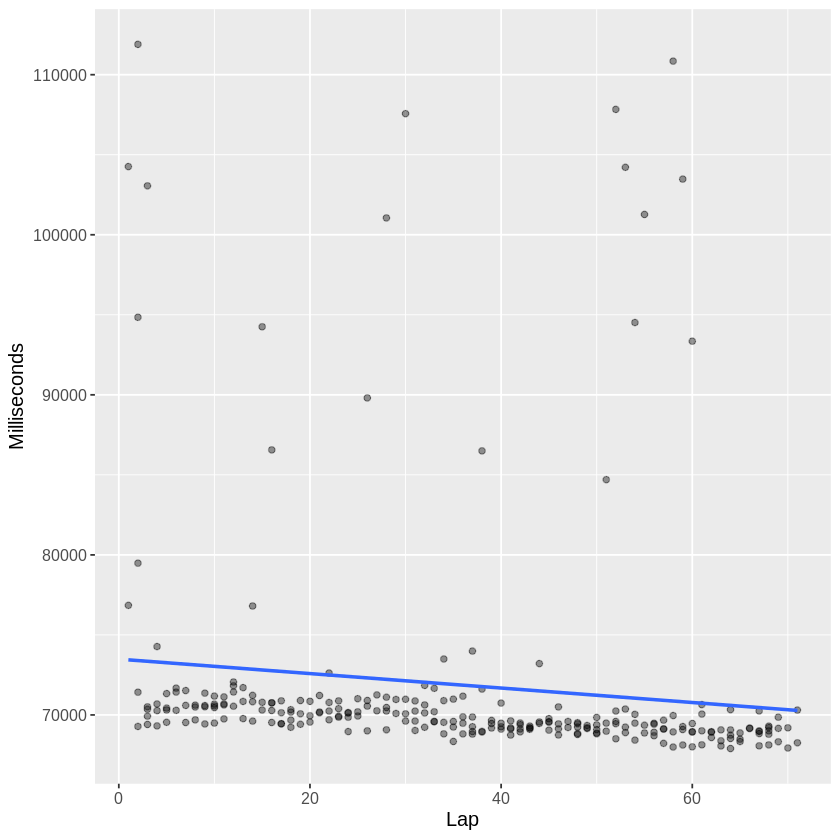

In [42]:
#11. Austria

cl_austria <- lec_laps %>%
                filter(raceId %in% austria_race_ID) 

cl_austria_clean <- cl_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n != 4)
cl_austria_clean

cl_austria_clean_ID <- cl_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_austria_races <- lec_laps %>%
                    filter(raceId %in% cl_austria_clean_ID)

formulaone_split <- initial_split(cl_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse()

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,53
1017,53
1059,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5327608,88.79347,1.479891


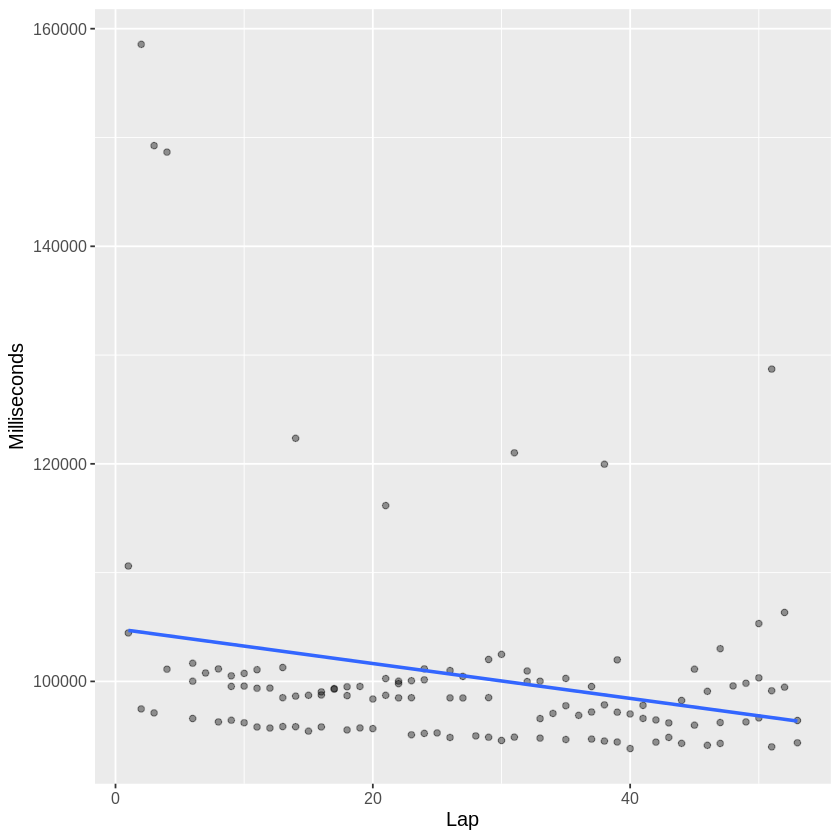

In [43]:
#12. France

cl_france <- lec_laps %>%
                filter(raceId %in% france_race_ID) 

cl_france_clean <- cl_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_france_clean
cl_france_clean_ID <- cl_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_france_races <- lec_laps %>%
                    filter(raceId %in% cl_france_clean_ID)

formulaone_split <- initial_split(cl_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse()

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1021,70
1033,69


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5832509,97.20849,1.620142


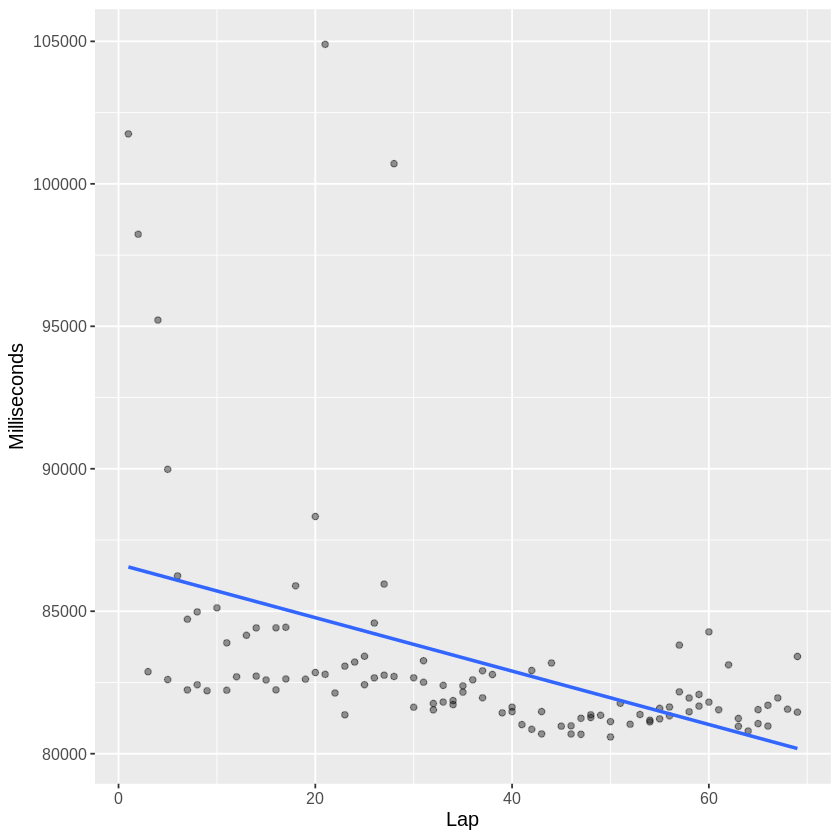

In [44]:
#13. Hungary

cl_hungary <- lec_laps %>%
                filter(raceId %in% hungary_race_ID) 

cl_hungary_clean <- cl_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_hungary_clean
cl_hungary_clean_ID <- cl_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_hungary_races <- lec_laps %>%
                    filter(raceId %in% cl_hungary_clean_ID)

formulaone_split <- initial_split(cl_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1022,44
1037,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5106122,85.10203,1.418367


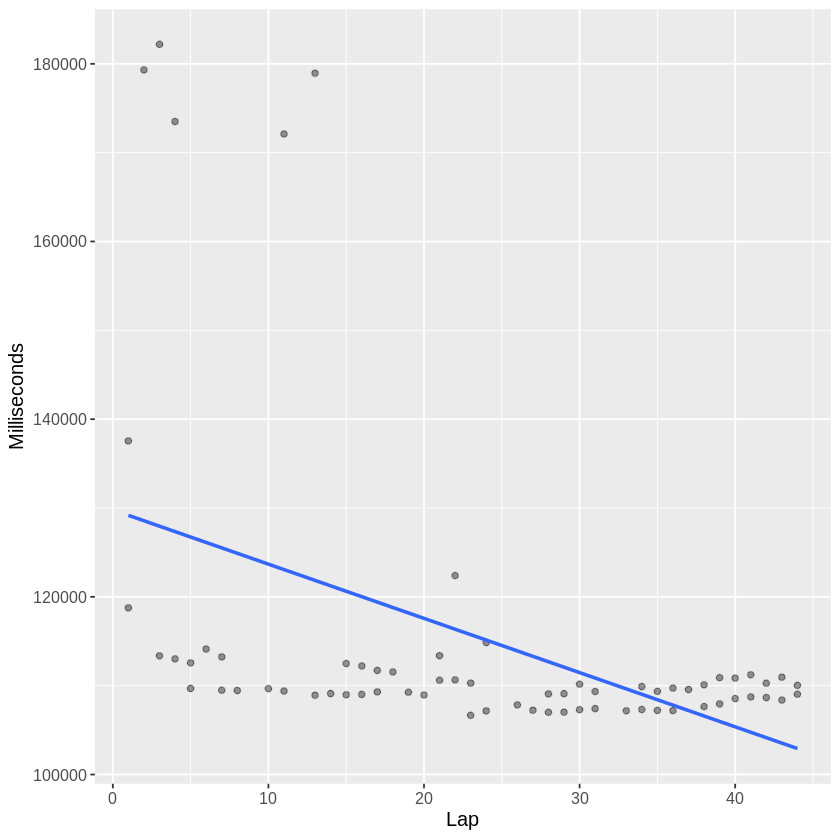

In [45]:
#14. Belgium

cl_belgium <- lec_laps %>%
                filter(raceId %in% belgium_race_ID) 

cl_belgium_clean <- cl_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        filter(n != 1)
cl_belgium_clean

cl_belgium_clean_ID <- cl_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_belgium_races <- lec_laps %>%
                    filter(raceId %in% cl_belgium_clean_ID)

formulaone_split <- initial_split(cl_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5484049,91.40082,1.523347


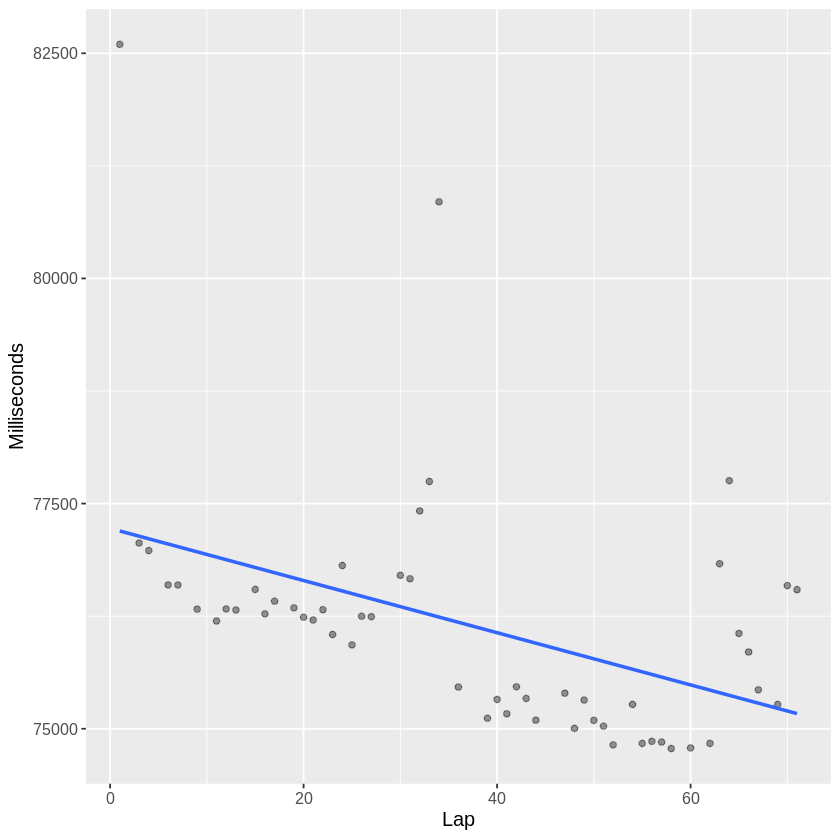

In [46]:
#15. Netherlands

cl_netherlands <- lec_laps %>%
                filter(raceId %in% netherlands_race_ID) 

cl_netherlands_clean <- cl_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cl_netherlands_clean
cl_netherlands_clean_ID <- cl_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_netherlands_races <- lec_laps %>%
                    filter(raceId %in% cl_netherlands_clean_ID)

formulaone_split <- initial_split(cl_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4703240,78.38733,1.306456


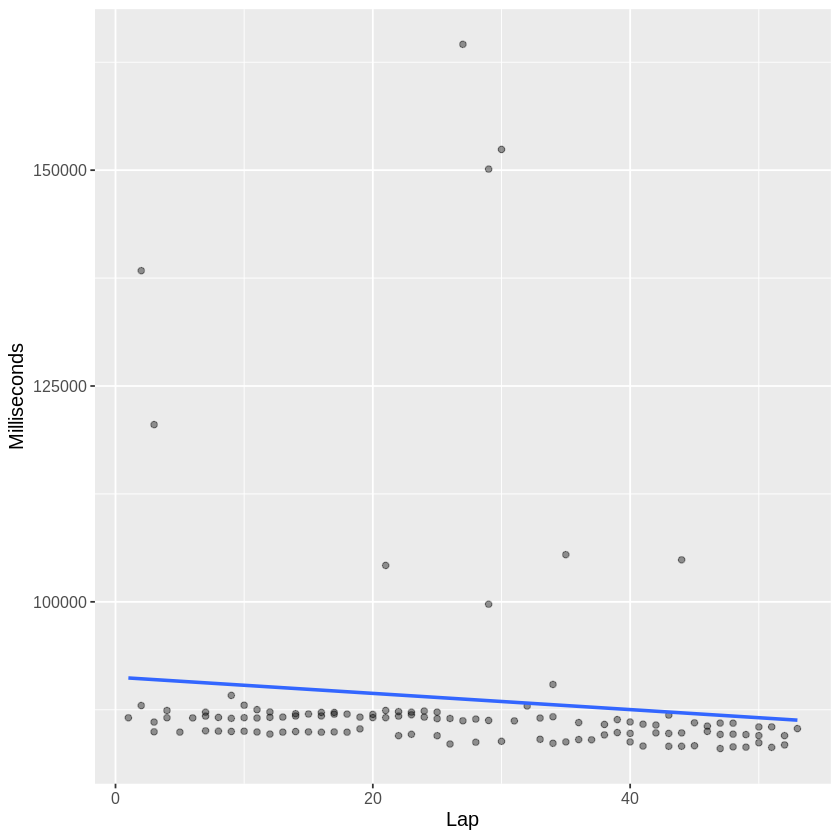

In [47]:
#16. Italy - Monza

cl_monza <- lec_laps %>%
                filter(raceId %in% monza_race_ID) 

cl_monza_clean <- cl_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 23)

cl_monza_clean_ID <- cl_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_monza_races <- lec_laps %>%
                    filter(raceId %in% cl_monza_clean_ID)

formulaone_split <- initial_split(cl_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6999286,116.6548,1.944246


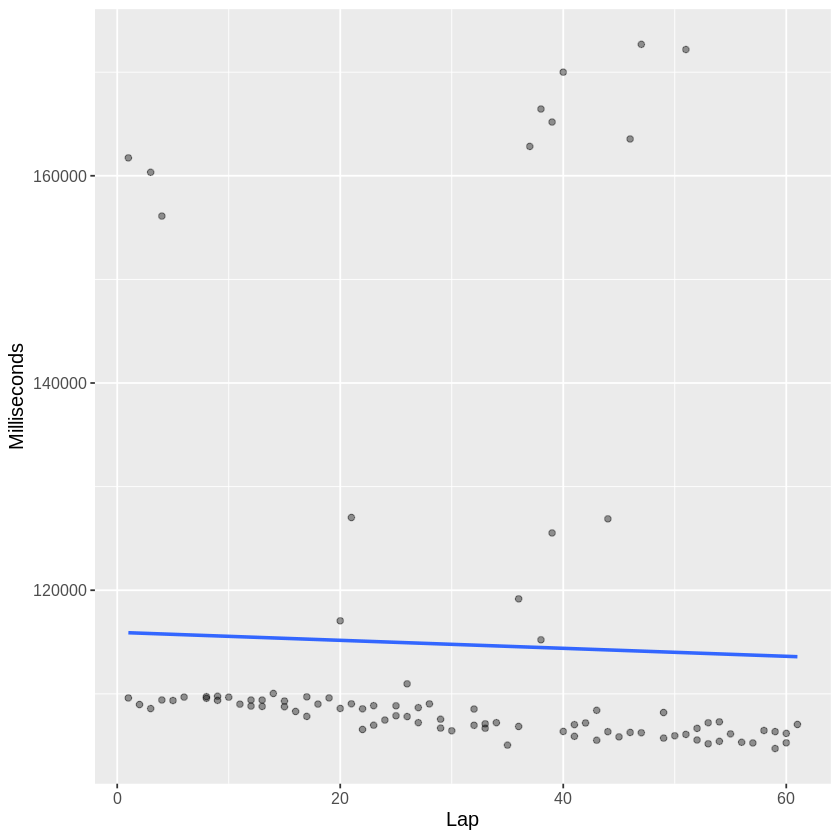

In [48]:
#17. Singapore

cl_singapore <- lec_laps %>%
                filter(raceId %in% singapore_race_ID) 

cl_singapore_clean <- cl_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_singapore_clean_ID <- cl_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_singapore_races <- lec_laps %>%
                    filter(raceId %in% cl_singapore_clean_ID)

formulaone_split <- initial_split(cl_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5115567,85.25944,1.420991


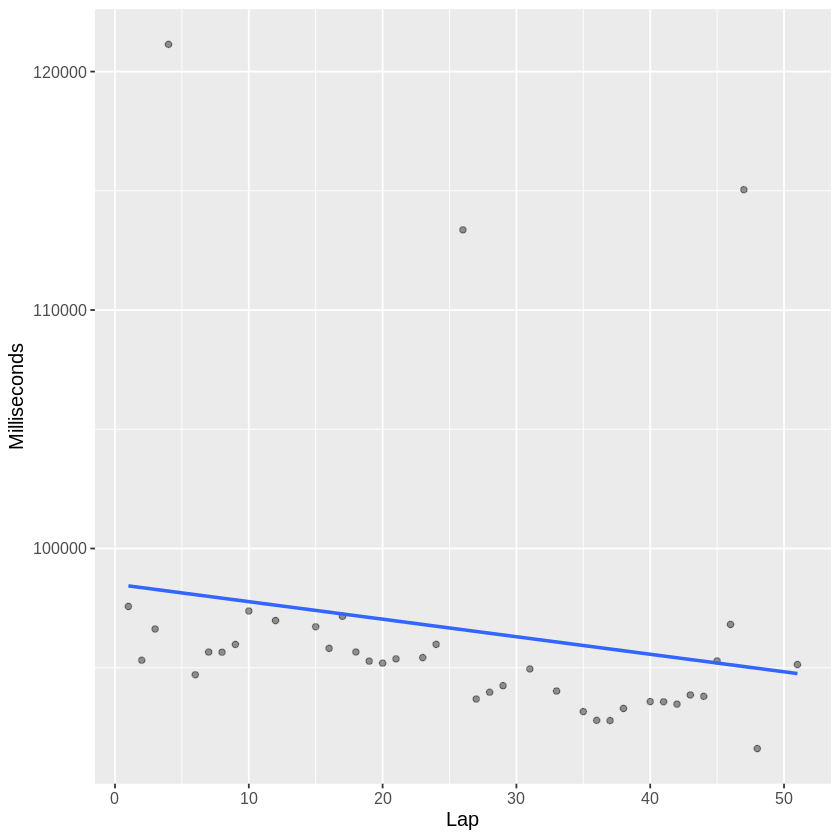

In [49]:
#18. Japan

cl_japan <- lec_laps %>%
                filter(raceId %in% japan_race_ID) 

cl_japan_clean <- cl_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 38)

cl_japan_clean_ID <- cl_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_japan_races <- lec_laps %>%
                    filter(raceId %in% cl_japan_clean_ID)

formulaone_split <- initial_split(cl_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5696454,94.94091,1.582348


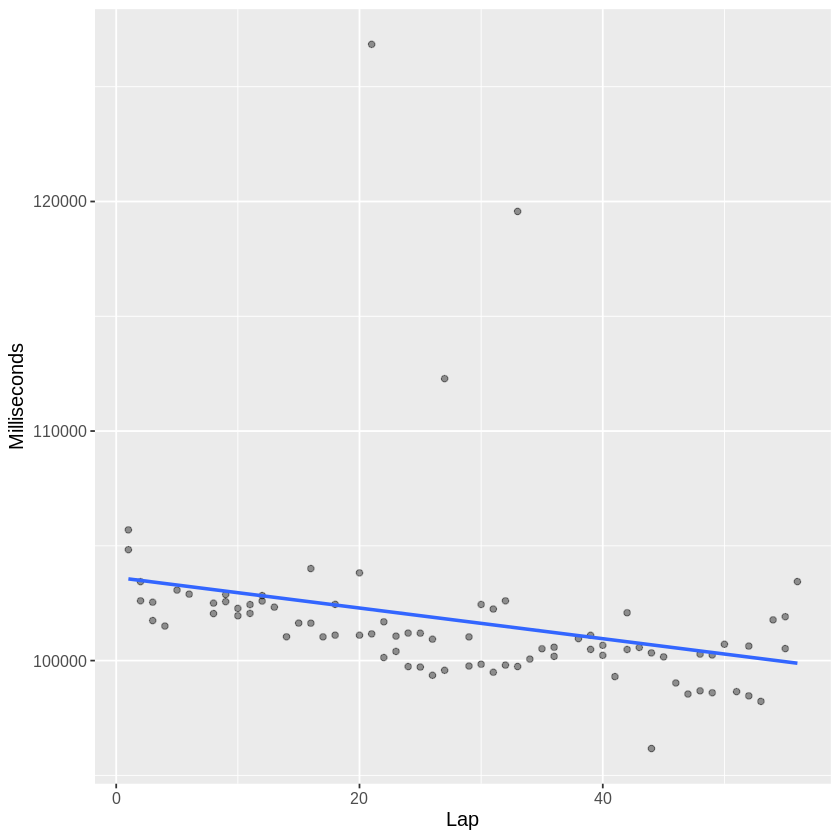

In [50]:
#19. USA, Austin

cl_austin <- lec_laps %>%
                filter(raceId %in% austin_race_ID) 

cl_austin_clean <- cl_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter( n!= 31)


cl_austin_clean_ID <- cl_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_austin_races <- lec_laps %>%
                    filter(raceId %in% cl_austin_clean_ID)

formulaone_split <- initial_split(cl_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5968401,99.47335,1.657889


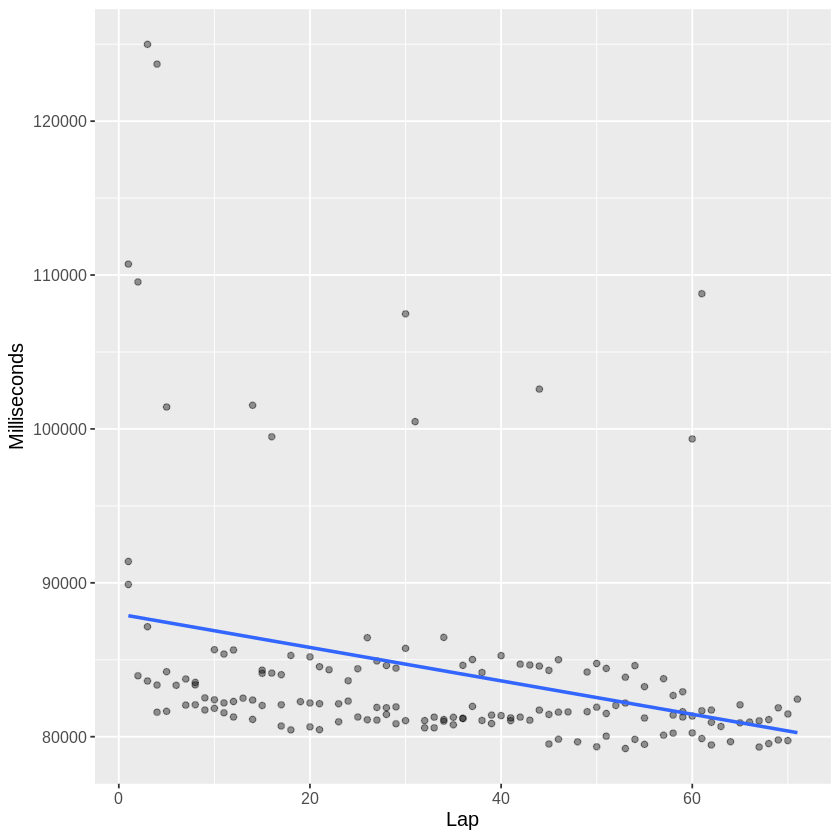

In [51]:
#20. Mexico

cl_mexico <- lec_laps %>%
                filter(raceId %in% mexico_race_ID) 

cl_mexico_clean <- cl_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_mexico_clean_ID <- cl_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_mexico_races <- lec_laps %>%
                    filter(raceId %in% cl_mexico_clean_ID)

formulaone_split <- initial_split(cl_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5410174,90.16956,1.502826


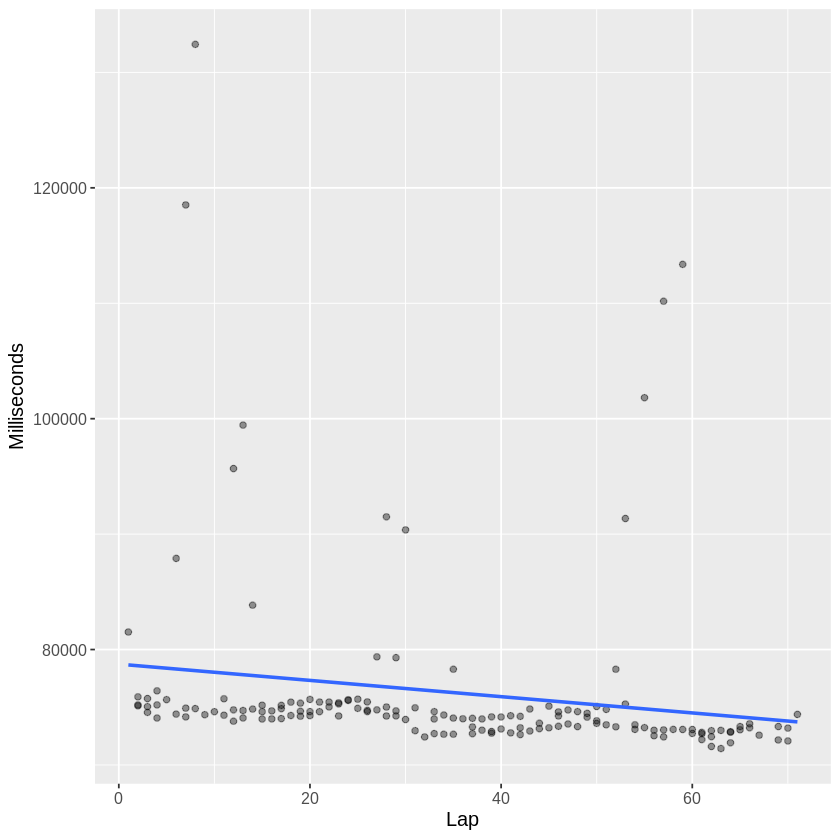

In [52]:
#21. Brazil

cl_brazil <- lec_laps %>%
                filter(raceId %in% brazil_race_ID) 

cl_brazil_clean <- cl_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_brazil_clean_ID <- cl_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_brazil_races <- lec_laps %>%
                    filter(raceId %in% cl_brazil_clean_ID)

formulaone_split <- initial_split(cl_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6196140,103.269,1.72115


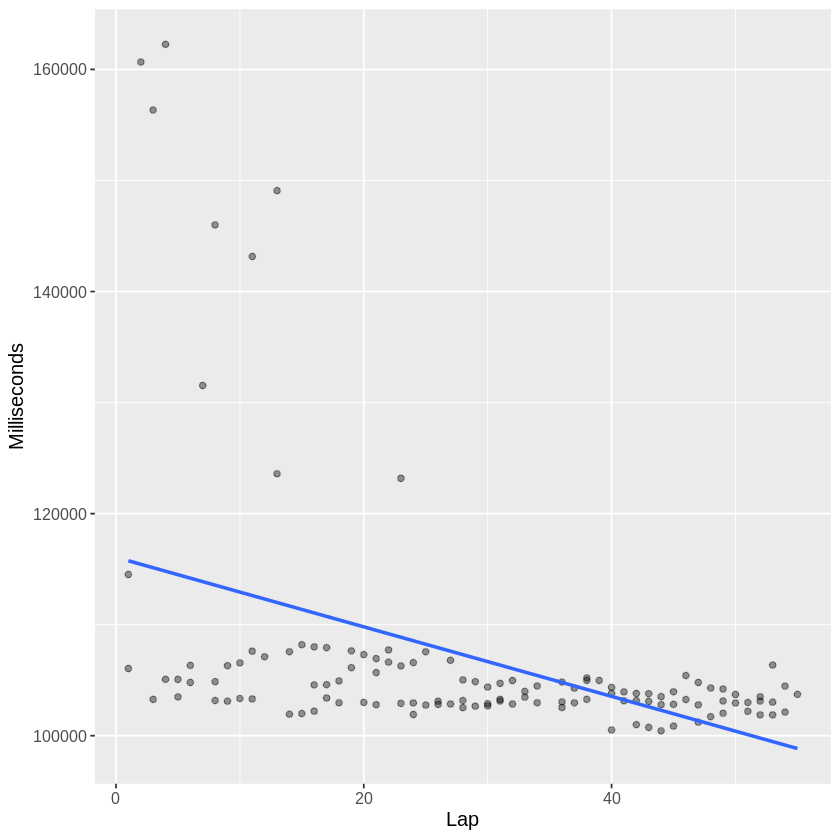

In [53]:
#22. UAE

cl_uae <- lec_laps %>%
                filter(raceId %in% uae_race_ID) 

cl_uae_clean <- cl_uae %>%
                        group_by(raceId) %>% 
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cl_uae_clean_ID <- cl_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

cl_uae_races <- lec_laps %>%
                    filter(raceId %in% cl_uae_clean_ID)

formulaone_split <- initial_split(cl_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 


### GETS PREDICTION

get_uae_prediction()

# Collection

In [55]:
rmse_col

write_csv(rmse_col, "cl_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,9633.971,1
rmse,standard,3985.852,2
rmse,standard,3592.938,3
rmse,standard,24116.327,4
rmse,standard,8124.323,5
rmse,standard,13789.132,6
rmse,standard,1278.587,7
rmse,standard,19799.876,8
rmse,standard,10407.011,9
